In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mesa_reader as mr
import os
import astropy.units as u
import astropy.constants as c
%matplotlib inline

## Timescales

**Dynamical timescale**: $ \displaystyle \tau_{\rm dyn} \approx \frac{1}{\sqrt{G \rho}}$

**Contraction timescale**: $\displaystyle \tau_{\rm con} \equiv \frac{dt}{d \ln \rho_{\rm c}}$

**Core growth timescale**: $\displaystyle \tau_{\rm core} \equiv \frac{dt}{d \ln M_{\rm core}}$

**Electron-capture timescale**: $\displaystyle \tau_{\rm ec} \equiv - \frac{dt}{d \ln Y_{\rm e}}$

In [106]:
def dyn_timescale(logRho):
    rho = 10**logRho
    rho = rho * u.g * (u.cm)**(-3)
    G = c.G.to(u.cm**3 * u.g**(-1) * u.s**(-2)) # convert to cgs units
    
    timescale = 1 / (np.sqrt(G * rho))
    return timescale.value

def contraction_timescale(history, mask_value = 8.0):
    '''
    Calculates the timescale for core contraction
    Unit: seconds
    '''
    
    # This is a dimensionless quantity
    Rho = 10**history.data('log_center_Rho')[np.where(history.data('log_center_Rho') >= mask_value)]
    logRho = np.log(Rho)
    logRho = logRho *u.LogUnit(physical_unit = u.g * (u.cm)**(-3)) #Unit: dex(g/cm3)
    
    timestep = 10**history.data('log_dt')[np.where(history.data('log_center_Rho') >= mask_value)] # in years
    timestep = (timestep * u.year).to(u.s)

    
    dt = timestep.value / logRho.value # Unit: s
    return dt

def growth_timescale(history, mask_value = 8.0):
    
    core_mass = history.data('c_core_mass')[np.where(history.data('log_center_Rho') >= mask_value)]
    core_mass = core_mass * u.Msun
    
    timestep = 10**history.data('log_dt')[np.where(history.data('log_center_Rho') >= mask_value)] # in years
    timestep = (timestep * u.year).to(u.s)
    
    
    dt = timestep.value / np.log(core_mass.value)
    return dt

def ecap_timescale(history, mask_value = 8.0):
    '''
    Calculates the timescale of electron captures
    Unit: seconds
    '''
    logYe = np.log(history.data('center_ye')[np.where(history.data('log_center_Rho') >= mask_value)]) 
    
    timestep = 10**history.data('log_dt')[np.where(history.data('log_center_Rho') >= mask_value)] # in years
    timestep = (timestep * u.year).to(u.s)
    
    
    dt = - (timestep.value / logYe) # Unit: s
    return dt

In [107]:
path = '/vol/aibn1107/data2/schanlar/HeCoresCondor/full_data/2.5000_0.0200_0.0000/LOGS'

In [108]:
h = mr.MesaData(f'{path}/history.data')

In [109]:
mask = 8.0

In [110]:
logTime = np.log(dyn_timescale(h.data('log_center_Rho')[np.where(h.data('log_center_Rho') >= mask)]))
logContraction = np.log(contraction_timescale(h, mask))
logEcap = np.log(ecap_timescale(h, mask))
logMcore = np.log(growth_timescale(h, mask))

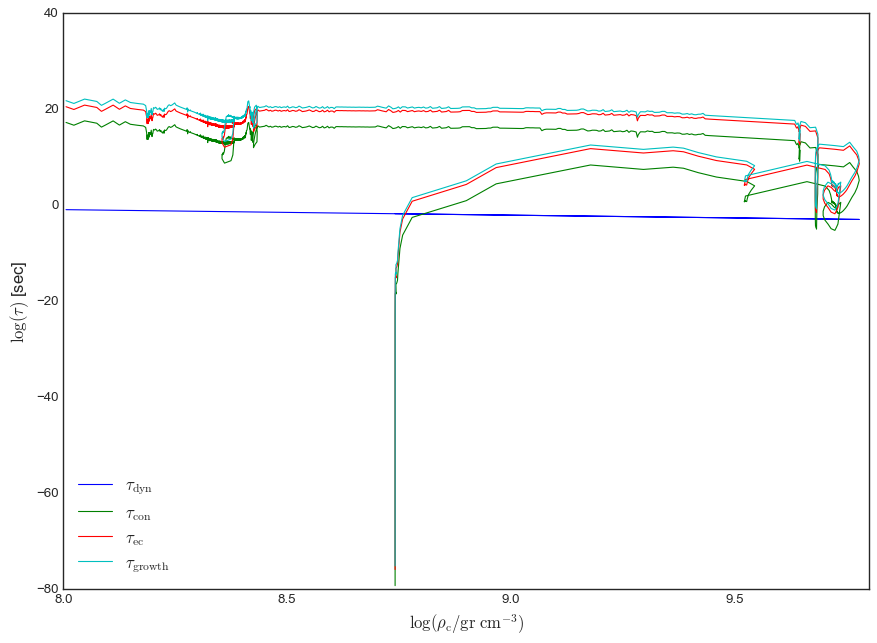

In [125]:
plt.style.use('seaborn-white')

plt.figure(figsize=(13,9))
plt.xlabel(r'$\log(\rm \rho_c / \rm gr \ cm^{-3})$', size = 15)
plt.ylabel(r'$\log(\tau)$ [sec]', size = 15)

plt.plot(h.data('log_center_Rho')[np.where(h.data('log_center_Rho') >= mask)], logTime, label = r'$\tau_{\rm dyn}$')
plt.plot(h.data('log_center_Rho')[np.where(h.data('log_center_Rho') >= mask)], logContraction, label = r'$\tau_{\rm con}$')
plt.plot(h.data('log_center_Rho')[np.where(h.data('log_center_Rho') >= mask)], logEcap, label = r'$\tau_{\rm ec}$')
plt.plot(h.data('log_center_Rho')[np.where(h.data('log_center_Rho') >= mask)], logMcore, label = r'$\tau_{\rm growth}$')

plt.legend(loc='lower left', prop={'size':15})